**FLIPKART MOBILE DATASET**


Developing a simple data analysis application with Machine Learning Model.

**EXPLORATORY DATA ANALYSIS**

**IMPORT AND LOAD DATA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Imported necessary python Libraries.

In [2]:
df=pd.read_csv('Flipkart_Mobiles.csv')
df

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990
...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989


**Insights** :



Read the .csv file using .read_csv() and displayed the dataset.

**BASIC DATA OVERVIEW**

In [3]:
df.shape

(3114, 8)

Used .shape() to display the number of rows and columns in the dataset.

In [4]:
df.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990


.head() returns first 5 values of the dataset. Here I showcased first 5 rows of the dataset.

In [5]:
df.dtypes

,0
Brand,object
Model,object
Color,object
Memory,object
Storage,object
Rating,float64
Selling Price,int64
Original Price,int64


Here I used .dtypes() to display the type of data in each column to check whethere all the datatypes are correct.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Model           3114 non-null   object 
 2   Color           3114 non-null   object 
 3   Memory          3071 non-null   object 
 4   Storage         3075 non-null   object 
 5   Rating          2970 non-null   float64
 6   Selling Price   3114 non-null   int64  
 7   Original Price  3114 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 194.8+ KB


Here I used .info() to display the number of non-null values in each column and it also useful to check whether all the column non-null values equals the RangeIndex(total number of columns).

In [7]:
df.describe()

,Rating,Selling Price,Original Price
count,2970.000000,3114.000000,3114.000000
mean,4.243098,26436.625562,28333.473025
std,0.271991,30066.892622,31525.599889
min,2.300000,1000.000000,1000.000000
25%,4.100000,9990.000000,10030.250000
50%,4.300000,15000.000000,16889.500000
75%,4.400000,28999.000000,31500.000000
max,5.000000,179900.000000,189999.000000


.describe() is used to display aggregate statistics such as mean, standard deviation, minimum, maximum, and percentiles (25%, 50%, and 75%) for numerical columns.

*  Mean of Selling Price and Original Price gives the insights of the average price range most mobiles fall into. This gives an insight into the typical pricing of mobiles in the dataset.

*  Minimum and Maximum values provide information about the lowest and highest values of ratings, selling prices, and original prices. This helps in identifying the price and rating range of the products in the dataset.

In [8]:
df['Brand'].value_counts()


,count
Brand,
SAMSUNG,719
Apple,387
realme,327
OPPO,260
Nokia,213
Xiaomi,198
Infinix,151
GIONEE,129
vivo,124


Here, I used .value_counts() on the 'Brand' column to display how many mobile phones are available for each brand. This is essential for understanding the distribution of mobile phones across different brands in the dataset.



**Insights:**

In the Data Overview I displayed general and basic information about the dataset like number of columns and rows and the counts of data.Also displayed aggregate functions for better understanding.
Here we can find insights of


*  Minimum and Maximum Pricing
*  Average Price
*  Minimum and Maximum Rating
*  Number of data


**DATA CLEANING AND HANDLING MISSING VALUES**

In [9]:
df.isnull().sum()

,0
Brand,0
Model,0
Color,0
Memory,43
Storage,39
Rating,144
Selling Price,0
Original Price,0


 Here I used .isnull().sum() to display number of non-null values as a total number to see how many values are non null values.

In [10]:
if df['Memory'].dtype == 'object':
    df['Memory']=[float(str(x).lower().replace('gb','').strip())if 'gb' in str(x).lower()
    else float(str(x).lower().replace('mb','').strip())/1024 if 'mb' in str(x).lower()
    else np.nan
    for x in df['Memory']]
    df['Storage']=[float(str(x).lower().replace('expandable upto ','').replace('gb','').strip()) if 'gb' in str(x).lower()
    else float(str(x).lower().replace('mb','').strip()) if 'mb' in str(x).lower()
    else np.nan
    for x in df['Storage']]
df.dtypes


,0
Brand,object
Model,object
Color,object
Memory,float64
Storage,float64
Rating,float64
Selling Price,int64
Original Price,int64


Here, I included code to convert the data types of the 'Memory' and 'Storage' columns.
In the original dataset, these columns were of object type, which is incorrect since memory and storage should be represented as integers for proper numerical analysis. After converting them to int, I also displayed the updated data types to confirm the changes.




In [11]:
df_dropped=df.dropna(how='all',inplace=True)
df_droppedc=df.dropna(how='all',inplace=True,axis=1)
df_dropped

Here I used .dropna() to drop the row only if all the values are null to ensure handling of data efficiently. df_dropped returned no values as no rows were dropped.


In [12]:
df.columns=df.columns.str.strip()
df.columns.unique()

Index(['Brand', 'Model', 'Color', 'Memory', 'Storage', 'Rating',
       'Selling Price', 'Original Price'],
      dtype='object')

Here I used .strip() to strip if any spaces are there in the column name to avoid further confusions. And also displayed names of the column to ensure no column name is repeated.

In [13]:
df['Memory'].fillna(df['Memory'].mean(),inplace=True)
df['Storage'].fillna(df['Storage'].mean(),inplace=True)
df['Rating'].fillna(df['Rating'].mean(),inplace=True)
df

<ipython-input-13-742d6c32268b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Memory'].fillna(df['Memory'].mean(),inplace=True)
<ipython-input-13-742d6c32268b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4.0,64.0,4.5,11990,15990
1,OPPO,A53,Mint Cream,4.0,64.0,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6.0,128.0,4.3,13990,17990
3,OPPO,A53,Mint Cream,6.0,128.0,4.3,13990,17990
4,OPPO,A53,Electric Black,4.0,64.0,4.5,11990,15990
...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6.0,128.0,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6.0,128.0,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8.0,128.0,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8.0,128.0,4.2,22989,22989


Here I filled the NaN values using .fillna() using mean and mode value of the column. And displayed after filling out the NaN values.

In [14]:
df.isnull().sum()

,0
Brand,0
Model,0
Color,0
Memory,0
Storage,0
Rating,0
Selling Price,0
Original Price,0


Checked if all null values are filled and dropped using .isnull().sum()

**Insights**

Data cleaning is an essential step where we ensure the dataset is accurate and consistent for analysis.
It involves identifying and handling null or missing values, either by eliminating them or filling them with appropriate values (e.g., mean, median, mode, or placeholders). This process improves data quality and helps avoid errors in analysis or model training.

**UNIVARIATE ANALYSIS**

Univariate analysis is used for single variable.

***Histogram***

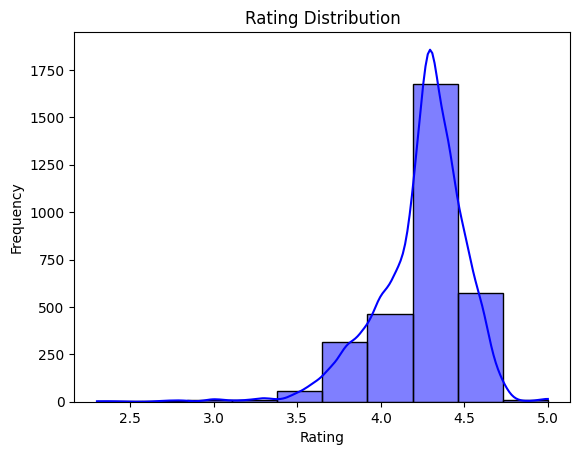

In [15]:
sns.histplot(df['Rating'],bins=10,kde=True,color='blue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Here I displayed how the rating varies and see which rating is more. We get the insights of how most of the mobiles are rated from the dataset

Text(0.5, 1.0, 'Box Plot of Ratings')

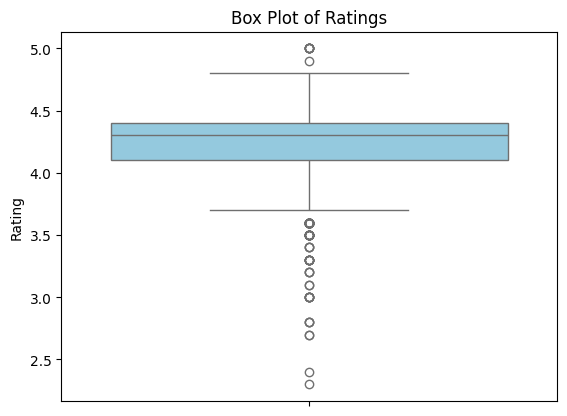

In [34]:
sns.boxplot(y=df['Rating'], color='skyblue')#with outliers
plt.title('Box Plot of Ratings')

Here We plotted box plot before removing outliers thus it shows more outliers. And also it shows how the rating varies and also it shows ratings below the lower bound which are the lowest rating mobiles.

***Count Plot***

Count Plot is used for counting how many times does a categorical data is used in the data.

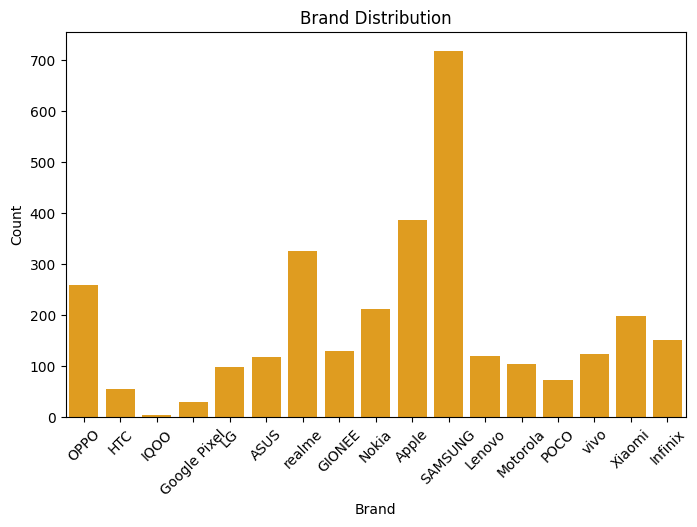

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x='Brand', data=df,color='orange')
plt.title('Brand Distribution')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45);
plt.show()

From the above count plot we can understand which brand has the most of the mobile. The above counntplot shows how many mobiles are there in each brand and also shows the comparision between the brands

**BIVARIATE ANALYSIS**

Bivariate Analysis is for two variables

***Scatter Plot***

Text(0, 0.5, 'Rating')

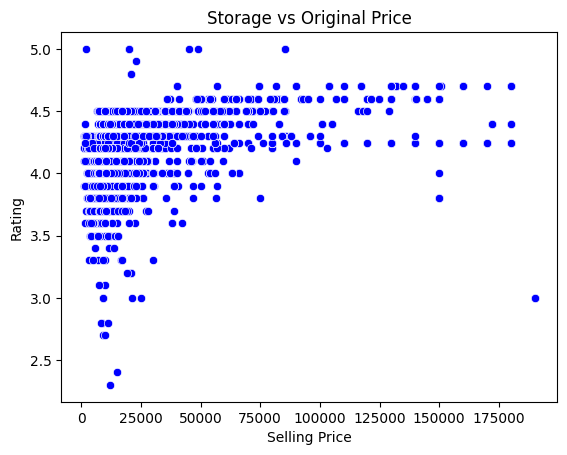

In [17]:
sns.scatterplot(x='Original Price', y='Rating', data=df,color='blue')
plt.title('Storage vs Original Price')
plt.xlabel('Selling Price')
plt.ylabel('Rating')


This scatter plot shows the relationship between selling price and rating of mobile phones.
Most phones are priced below ₹50,000 and rated between 4.0 and 4.8.
Higher-priced phones also tend to have high ratings, but overall, there's no strong correlation between price and rating.

***Box Plot***

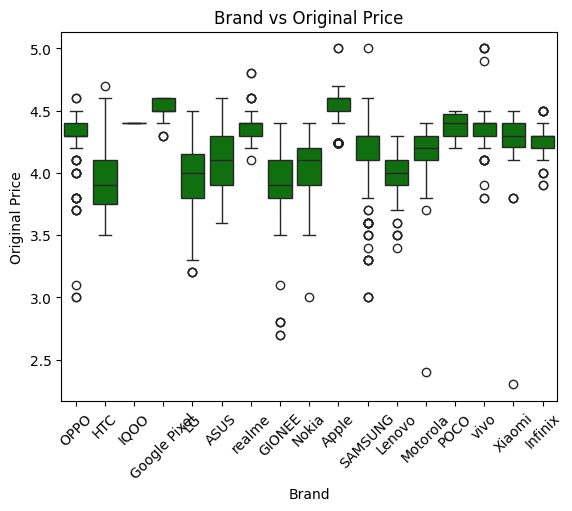

In [18]:
sns.boxplot(x='Brand', y='Rating', data=df,color='green')
plt.title('Brand vs Original Price')
plt.xlabel('Brand')
plt.ylabel('Original Price')
plt.xticks(rotation=45);

The box plot comparing different mobile brands against their original prices reveals notable patterns in price distribution. Brands like Apple and Google Pixel show significantly higher median prices, indicating their premium market positioning. In contrast, brands such as Infinix, vivo, and realme have relatively lower median prices, aligning with their reputation for offering budget-friendly options. The spread of prices (interquartile range) is wider for brands like Apple and Samsung, suggesting a broader product range, while others like IQOO and ASUS display tighter price distributions, implying more consistent pricing. Outliers are evident across most brands, which may be due to special editions or anomalies in data entry. Overall, this visualization helps identify pricing strategies and market segmentation among different smartphone brands.












**OUTLIER DETECTION**

Lower Bound: 3.6499999999999986
Upper Bound: 4.850000000000001


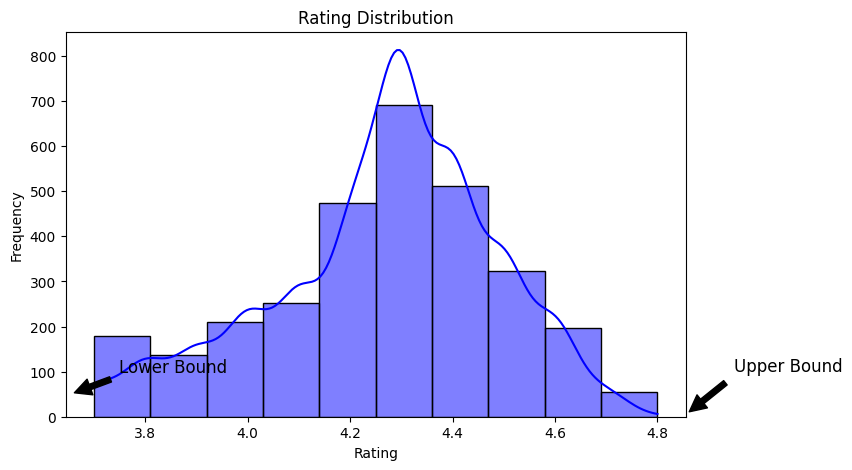

In [40]:
Q1=df['Rating'].quantile(0.25)
Q2 = df['Rating'].median()
Q3=df['Rating'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print('Lower Bound:',lower_bound)
print('Upper Bound:',upper_bound)
df_cleaned=df[(df['Rating']>=lower_bound)&(df['Rating']<=upper_bound)]
plt.figure(figsize=(8,5))
sns.histplot(outliers_rating['Rating'],bins=10,kde=True,color='blue')
plt.annotate('Lower Bound',xy=(lower_bound,48),xytext=(lower_bound+0.1,99),arrowprops=dict(facecolor='black',shrink=0.12),fontsize=12)
plt.annotate('Upper Bound',xy=(upper_bound,0),xytext=(upper_bound+0.1,100),arrowprops=dict(facecolor='black',shrink=0.12),fontsize=12)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

The above histogram shows the ratings after the outliers being removed. we can get the insights that most of the mobile phones are rated around 3.8 to 4.8 and also most of the ratings are around 4.3 to 4.4

In [58]:
outliers_rating #displays data after the outlier removed


,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4.0,64.0,4.5,11990,15990
1,OPPO,A53,Mint Cream,4.0,64.0,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6.0,128.0,4.3,13990,17990
3,OPPO,A53,Mint Cream,6.0,128.0,4.3,13990,17990
4,OPPO,A53,Electric Black,4.0,64.0,4.5,11990,15990
...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6.0,128.0,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6.0,128.0,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8.0,128.0,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8.0,128.0,4.2,22989,22989


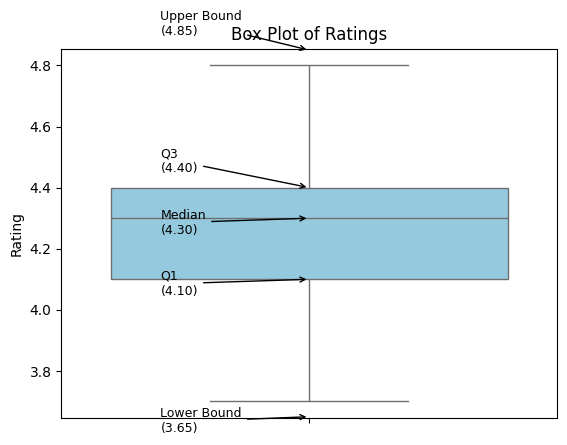

In [41]:
sns.boxplot(y=df_cleaned['Rating'], color='skyblue')
plt.title('Box Plot of Ratings')
plt.annotate(f'Lower Bound\n({lower_bound:.2f})', xy=(0, lower_bound), xytext=(-0.3, lower_bound - 0.05),
             arrowprops=dict(arrowstyle='->'), fontsize=9)
plt.annotate(f'Q1\n({Q1:.2f})', xy=(0, Q1), xytext=(-0.3, Q1 - 0.05),
             arrowprops=dict(arrowstyle='->'), fontsize=9)
plt.annotate(f'Median\n({Q2:.2f})', xy=(0, Q2), xytext=(-0.3, Q2 - 0.05),
             arrowprops=dict(facecolor='blue', arrowstyle='->'), fontsize=9)
plt.annotate(f'Q3\n({Q3:.2f})', xy=(0, Q3), xytext=(-0.3, Q3 + 0.05),
             arrowprops=dict(arrowstyle='->'), fontsize=9)
plt.annotate(f'Upper Bound\n({upper_bound:.2f})', xy=(0, upper_bound), xytext=(-0.3, upper_bound+0.05 ),
             arrowprops=dict(arrowstyle='->'), fontsize=9)
plt.show()


The above boxplot shows there is no outlier as all the outliers are removed. And also it shows the percentiles and the median value. From here we can see how the rating varies after removal of outliers

**Insights**

The outlier detection performed on the mobile ratings using the IQR (Interquartile Range) method helps in identifying and filtering out extreme values that could skew the analysis. By calculating the lower and upper bounds, we were able to isolate the ratings that fall within a statistically acceptable range. Visualizing the cleaned data through a histogram reveals that the majority of mobile phones are rated between 4.0 and 4.6, suggesting that most users are generally satisfied with their purchases. The box plot further reinforces this, clearly showing the median and quartile spread of the ratings, while also highlighting the absence of extreme outliers in the refined data. These insights indicate that the dataset has a high concentration of positively rated devices, with only a few deviations from the norm.










**MACHINE LEARNING MODEL**

In [59]:
x=df.drop('Selling Price',axis=1)#With outliers
x

,Brand,Model,Color,Memory,Storage,Rating,Original Price
0,OPPO,A53,Moonlight Black,4.0,64.0,4.5,15990
1,OPPO,A53,Mint Cream,4.0,64.0,4.5,15990
2,OPPO,A53,Moonlight Black,6.0,128.0,4.3,17990
3,OPPO,A53,Mint Cream,6.0,128.0,4.3,17990
4,OPPO,A53,Electric Black,4.0,64.0,4.5,15990
...,...,...,...,...,...,...,...
3019,SAMSUNG,M52 5G,Blazing Black,6.0,128.0,4.3,25990
3020,SAMSUNG,M52 5G,Icy Blue,6.0,128.0,4.3,28449
3021,SAMSUNG,M52 5G,Icy Blue,8.0,128.0,4.3,31489
3022,SAMSUNG,M52 5G,Slate Black,8.0,128.0,4.2,22989


The above is the dataset without the Independent or Target variable with outliers.

In [23]:
y=df['Selling Price']
y

,Selling Price
0,11990
1,11990
2,13990
3,13990
4,11990
...,...
3109,25990
3110,25489
3111,27239
3112,22989


The above is the Target Variable column

In [60]:
df_cleaned #Cleaned data without outliers

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4.0,64.0,4.5,11990,15990
1,OPPO,A53,Mint Cream,4.0,64.0,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6.0,128.0,4.3,13990,17990
3,OPPO,A53,Mint Cream,6.0,128.0,4.3,13990,17990
4,OPPO,A53,Electric Black,4.0,64.0,4.5,11990,15990
...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6.0,128.0,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6.0,128.0,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8.0,128.0,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8.0,128.0,4.2,22989,22989


In [44]:
df_cleaned.to_csv('cleaned_file.csv', index=False)

***Random Forest Model***

I used Random Forest Model which is a regression model because my Target variable 'Selling Price' is a numerical value.

*  I used Random Forest for better accuracy in prediction

In [50]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
df_encoded = pd.get_dummies(df_cleaned, columns=['Brand', 'Model', 'Color'], drop_first=True)
#Encoding data for machine learning model as binary
X = df_encoded.drop('Selling Price', axis=1)
y = df_encoded['Selling Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#used 100 estimators for better prediction
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 11369545.858158827
R² Score: 0.9841410060972354


In [53]:
data = pd.DataFrame({'Actual Selling Price': y_test, 'Predicted Selling Price': y_pred})
data

,Actual Selling Price,Predicted Selling Price
3105,7999,8823.25
254,31999,28991.15
1762,14499,17181.81
1660,12990,11933.49
1060,3000,7678.75
...,...,...
2627,14999,15008.99
986,1625,1605.54
7,9490,9550.00
706,19999,19677.37


The above dataframe shows the tabular format of Actual price (vs) Predicted price for comparision and better prediction.

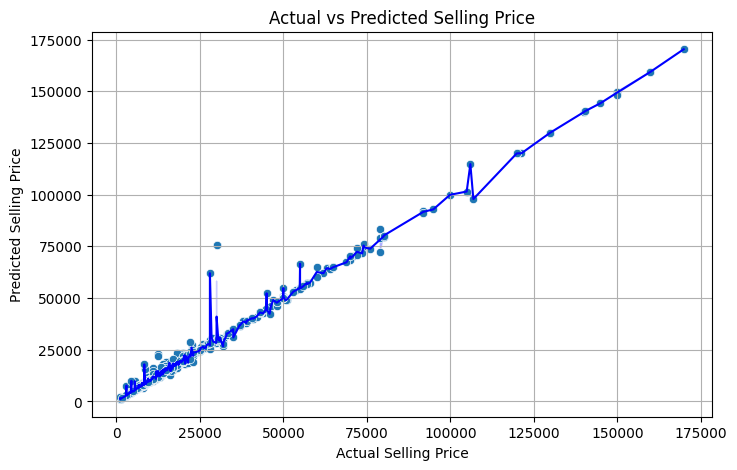

In [57]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=y_test, y=y_pred, color='blue')
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.grid()
plt.show()


**Overall Insights***

This project focuses on analyzing and predicting the selling price of mobile phones using a dataset sourced from Flipkart. Initially, the dataset underwent thorough cleaning, including handling of missing values, removal of duplicates, and treatment of outliers—especially in numeric columns like Rating and Original Price. During exploratory data analysis (EDA), univariate and bivariate analysis helped uncover key relationships and distribution patterns. For instance, the box plot of Brand vs Original Price highlighted clear pricing tiers among brands—premium (e.g., Apple, Google Pixel), mid-range (e.g., Samsung, Motorola), and budget (e.g., Infinix, vivo). Features such as RAM, ROM, Battery, and Processor type were found to influence the selling price significantly.

For machine learning, a Random Forest Regressor was implemented after one-hot encoding categorical features like Brand, Model, and Color. The model showed good performance with minimal tuning, giving a reliable prediction of selling price. Evaluation metrics such as Mean Squared Error (MSE) and R² Score confirmed the model's effectiveness. This process demonstrates the importance of structured preprocessing and model selection in building a robust price prediction system. Overall, the project offers valuable insights into pricing trends, brand strategies, and the potential of machine learning in e-commerce product evaluation.